In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 47.8 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()
!yolo checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.6/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Hah2CF1wI24eOA9ltZLK")
project = rf.workspace("wasteclassification-xhiqj").project("waste-classification-nufuz")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Waste-Classification-1 in yolov8:: 100%|██████████| 2326/2326 [00:00<00:00, 7394.49it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=51 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 99.4MB/s]
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Waste-Classification-1/data.yaml, epochs=51, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

In [ ]:
from IPython.display import display, Image

In [ ]:
!ls /content/runs/detect/train


args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1734056958.abf116a35b43.3515.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2624.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2625.jpg  weights
P_curve.png					    train_batch2626.jpg
PR_curve.png					    train_batch2.jpg


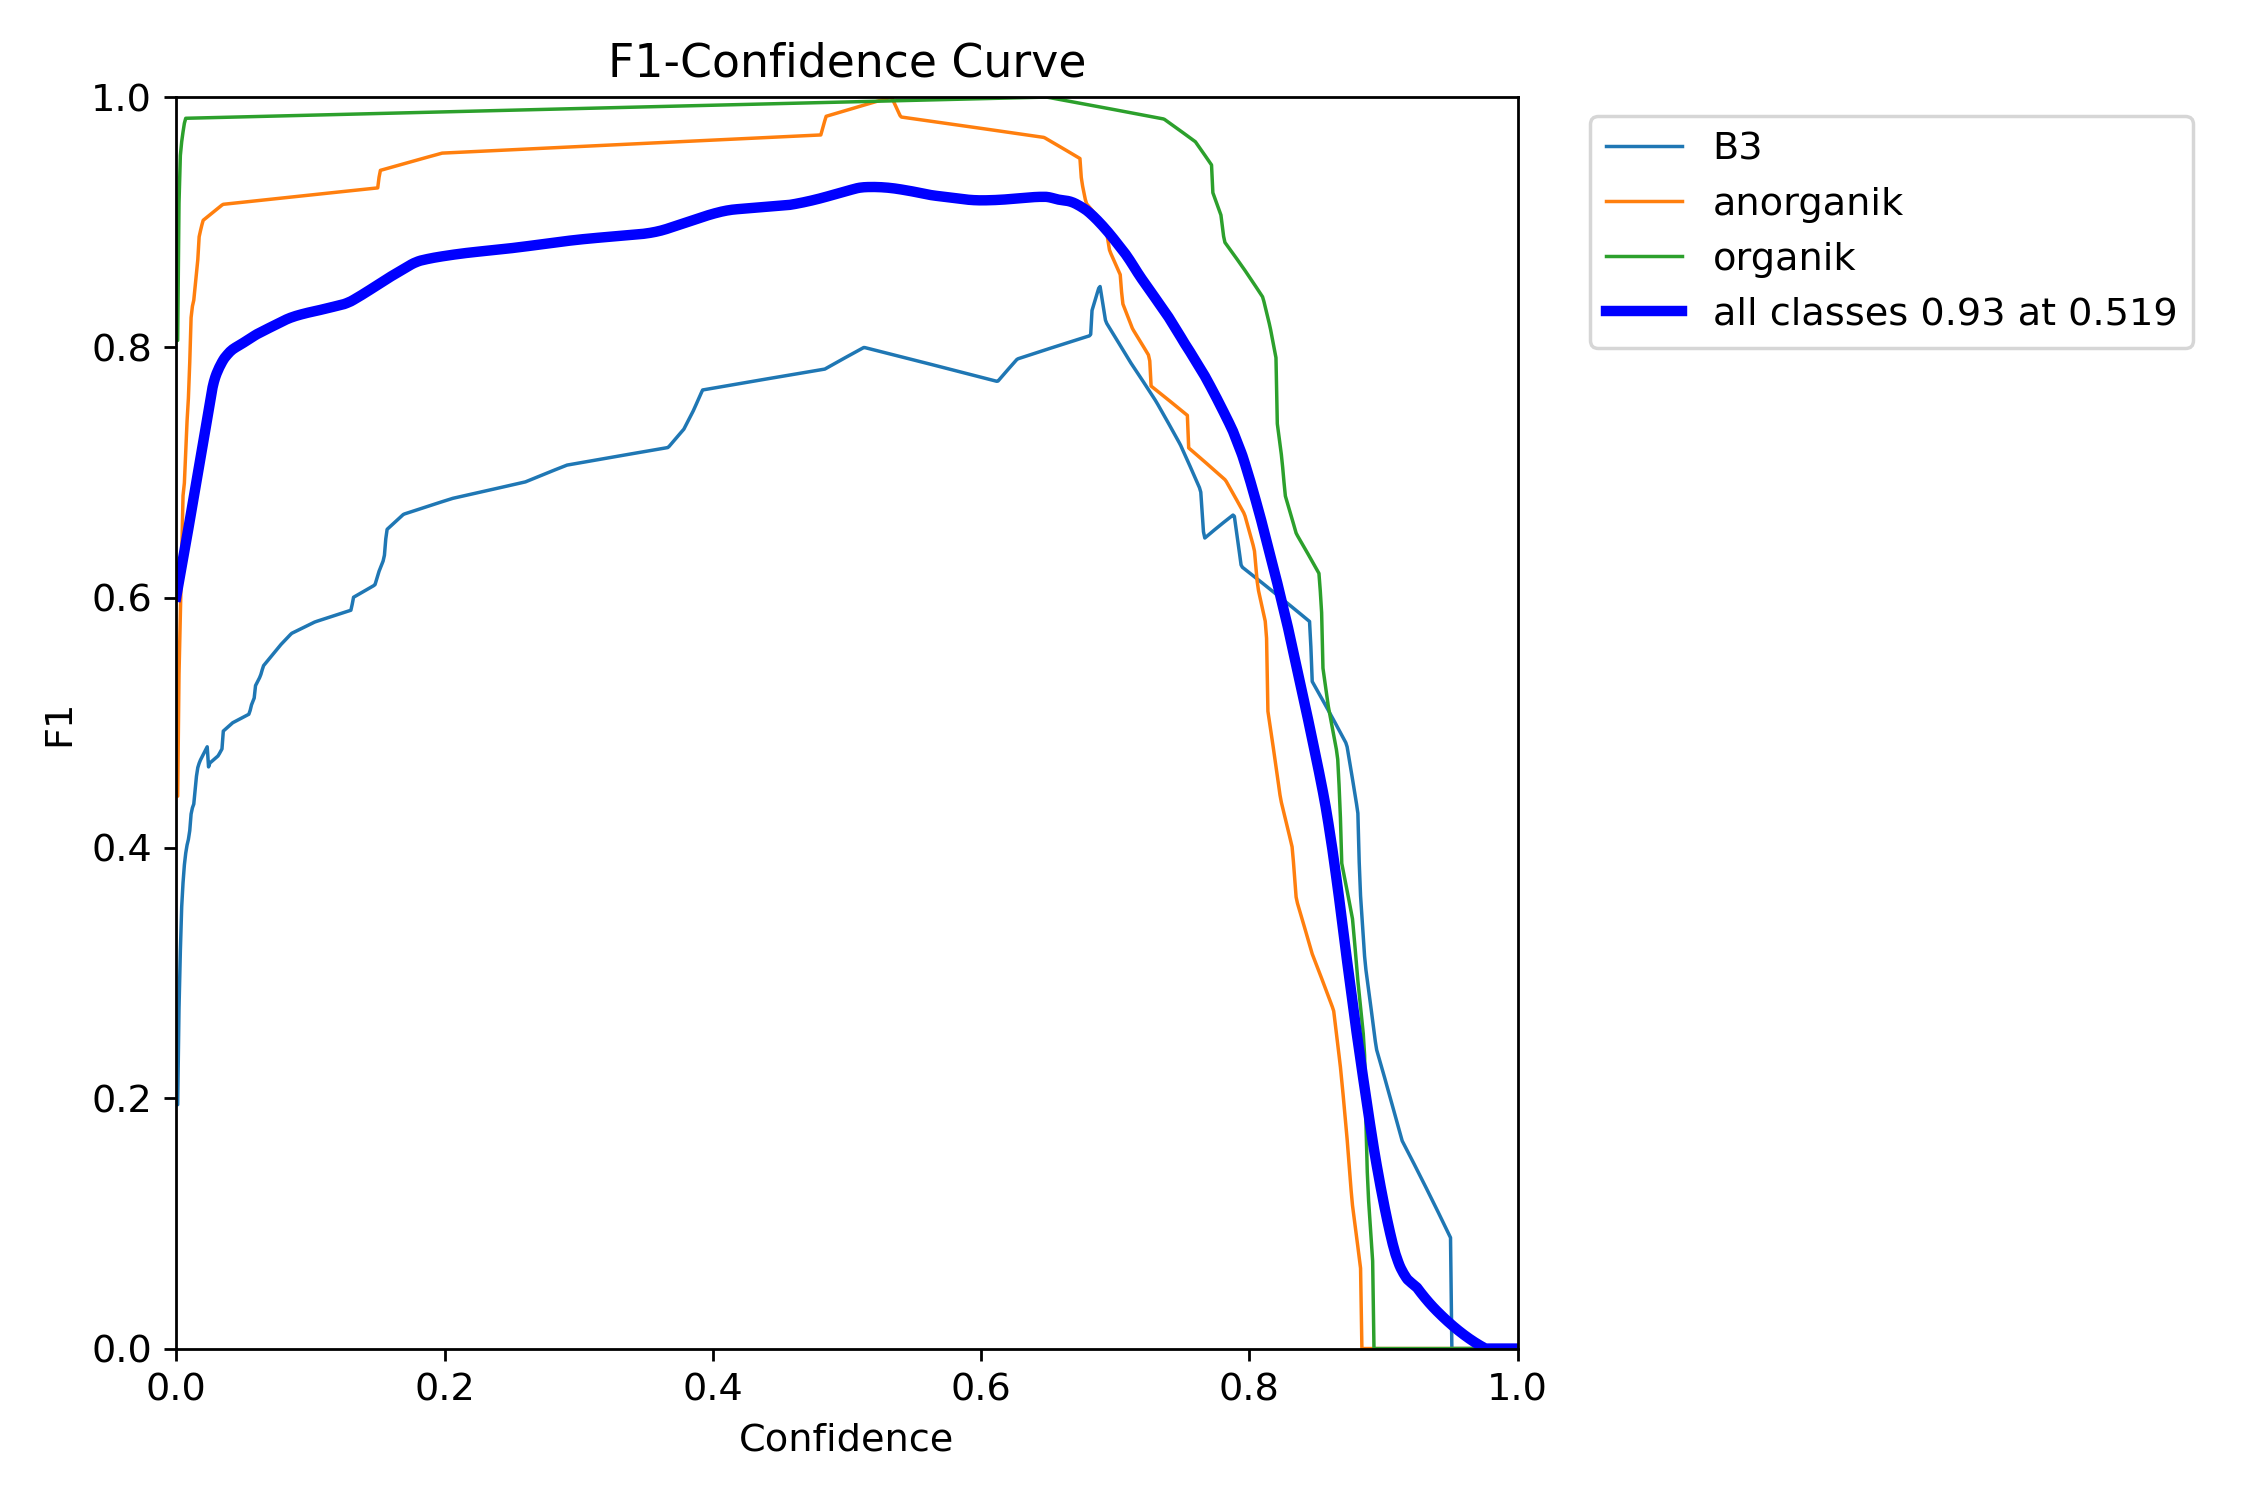

In [ ]:
Image(filename='/content/runs/detect/train/F1_curve.png', width=600)

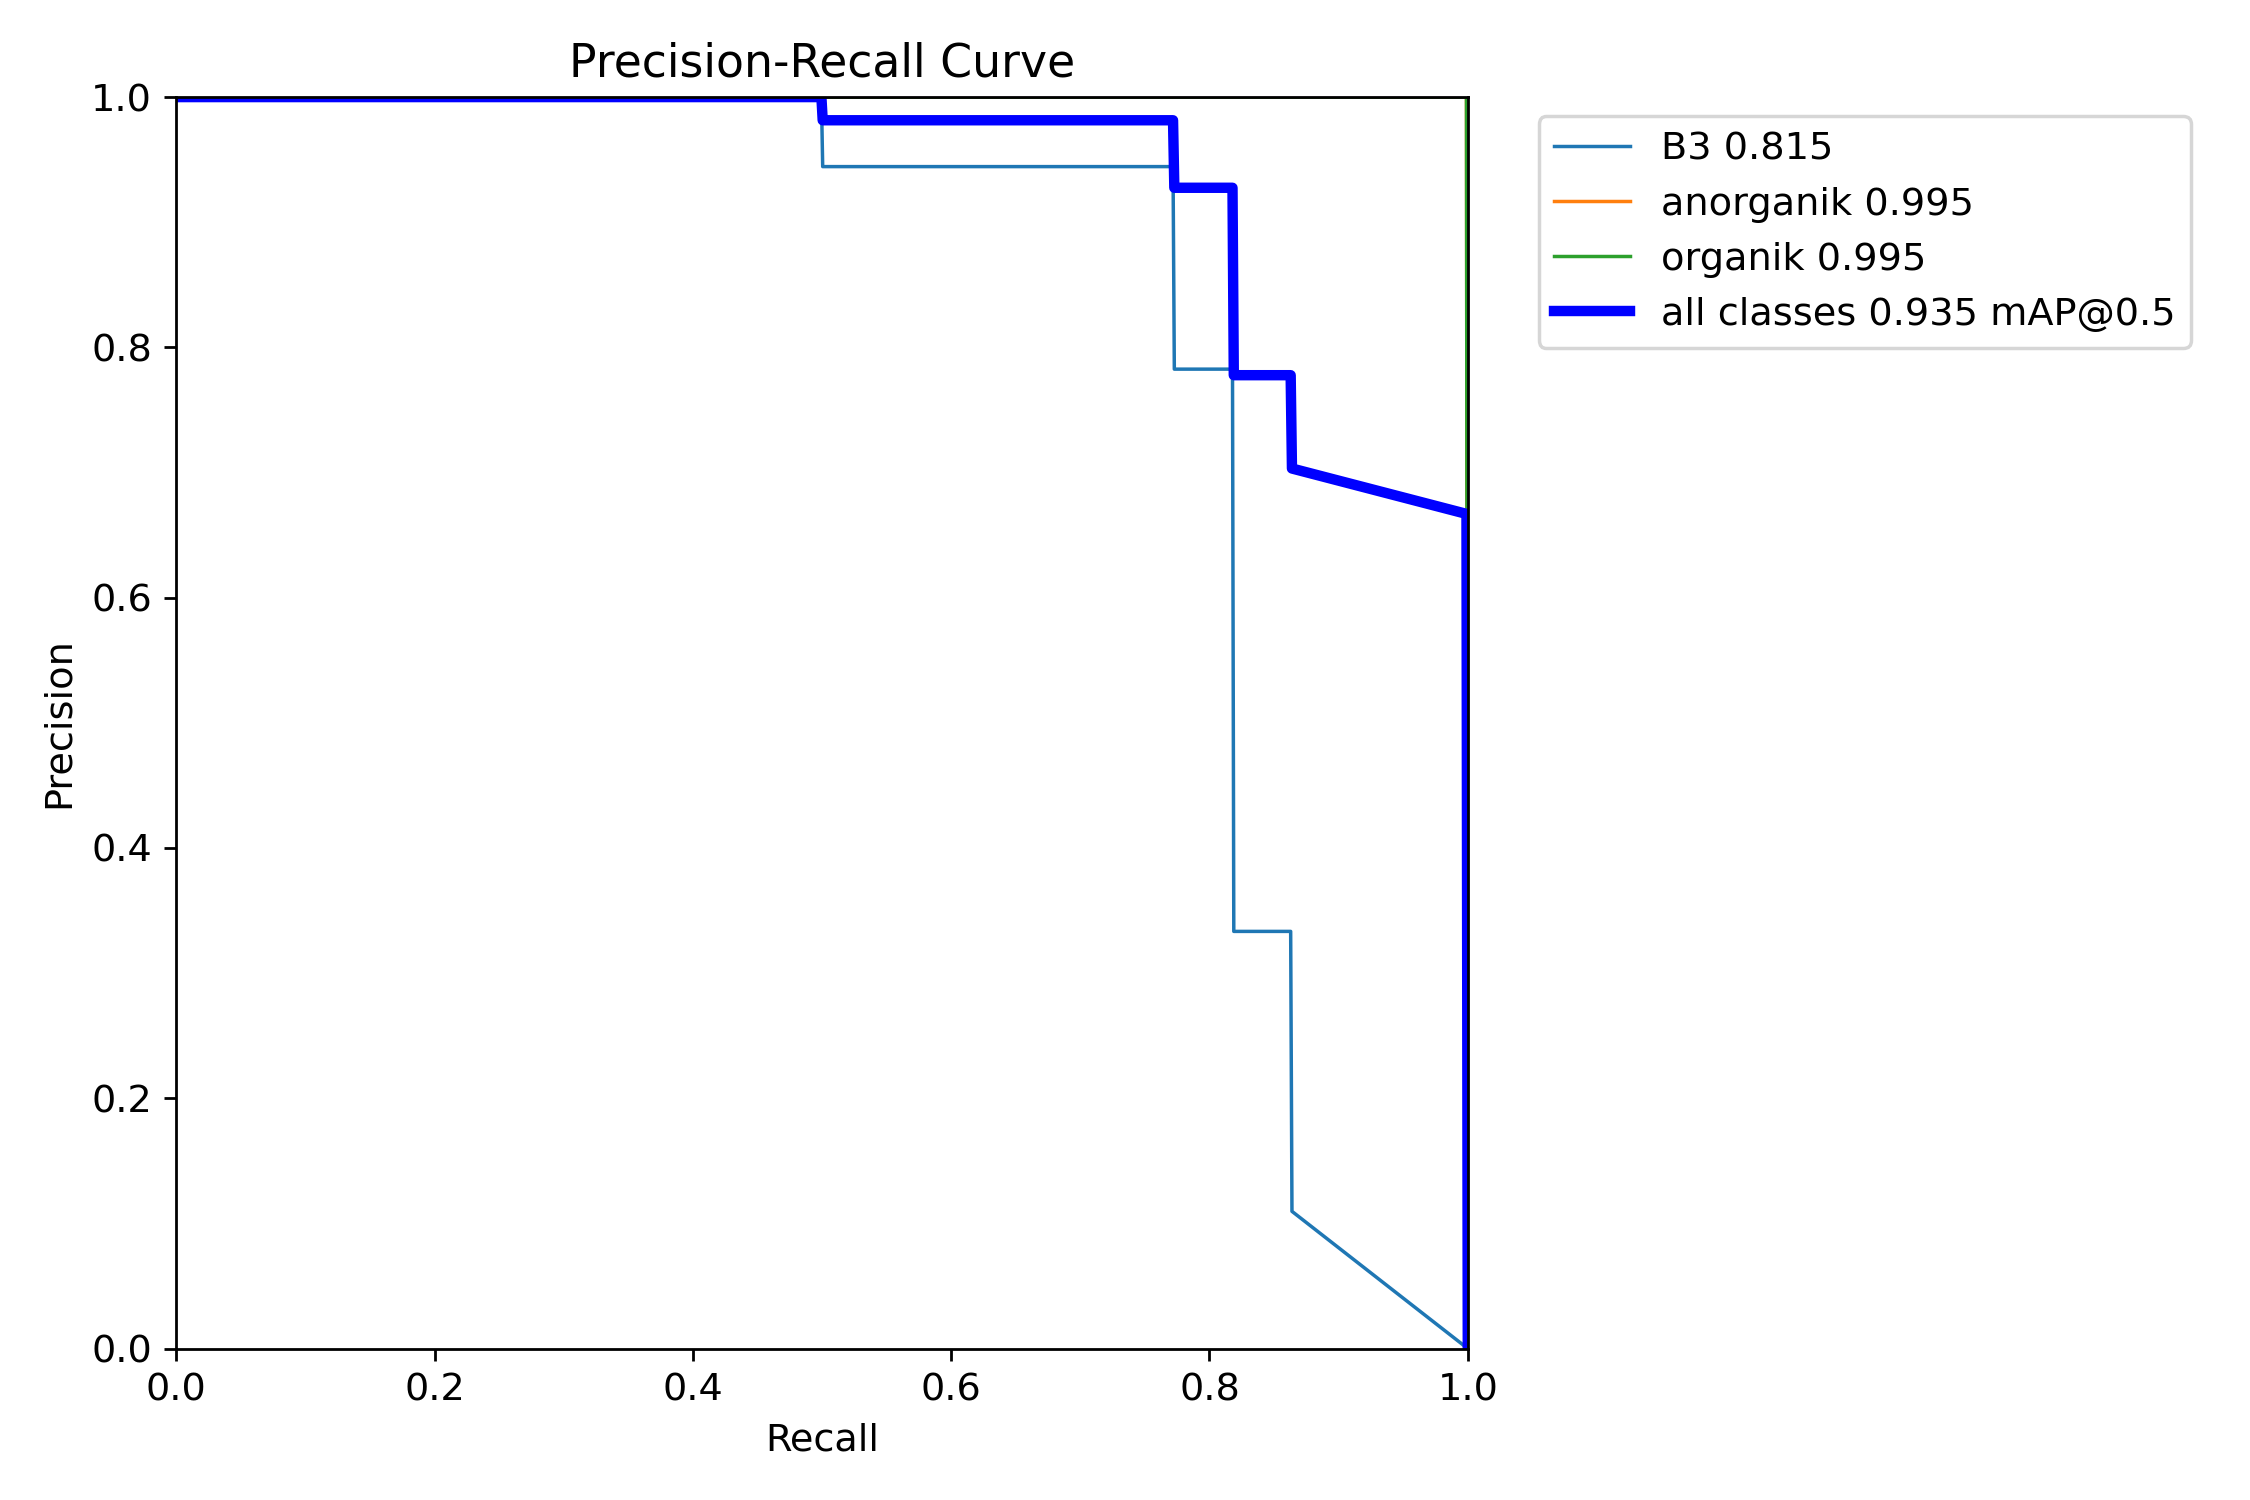

In [ ]:
Image(filename='/content/runs/detect/train/PR_curve.png', width=800)

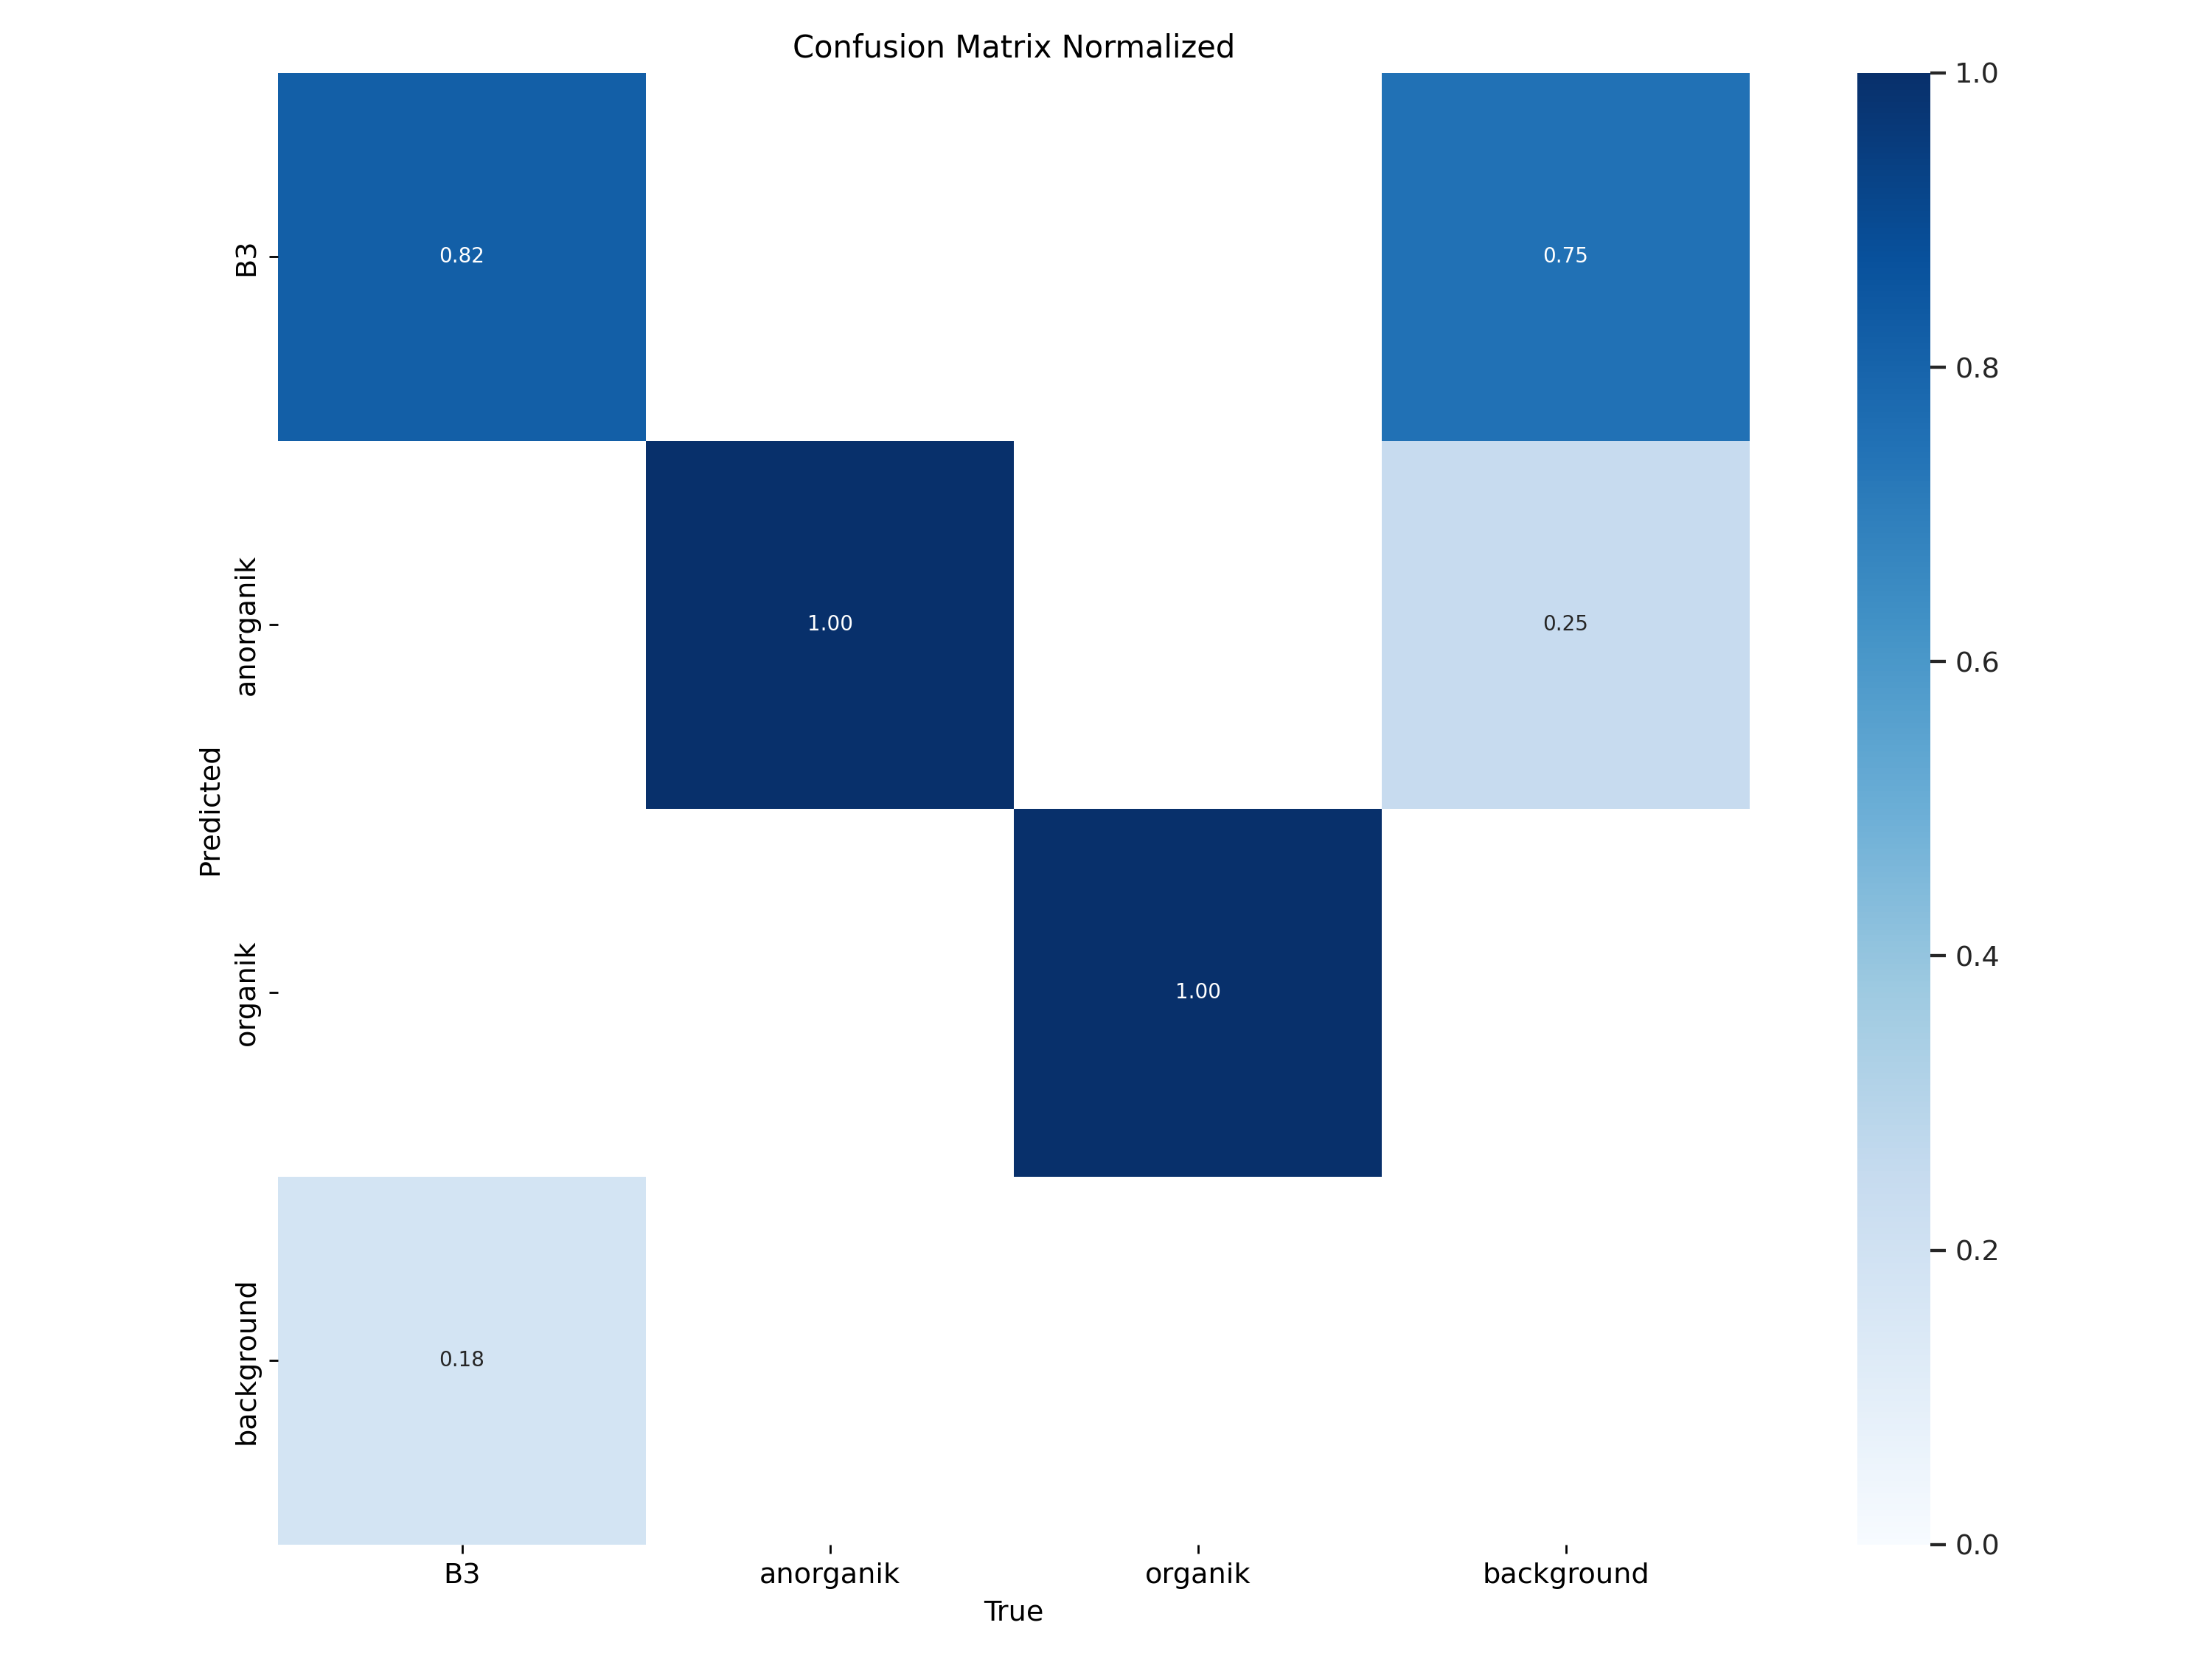

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix_normalized.png', width=800)

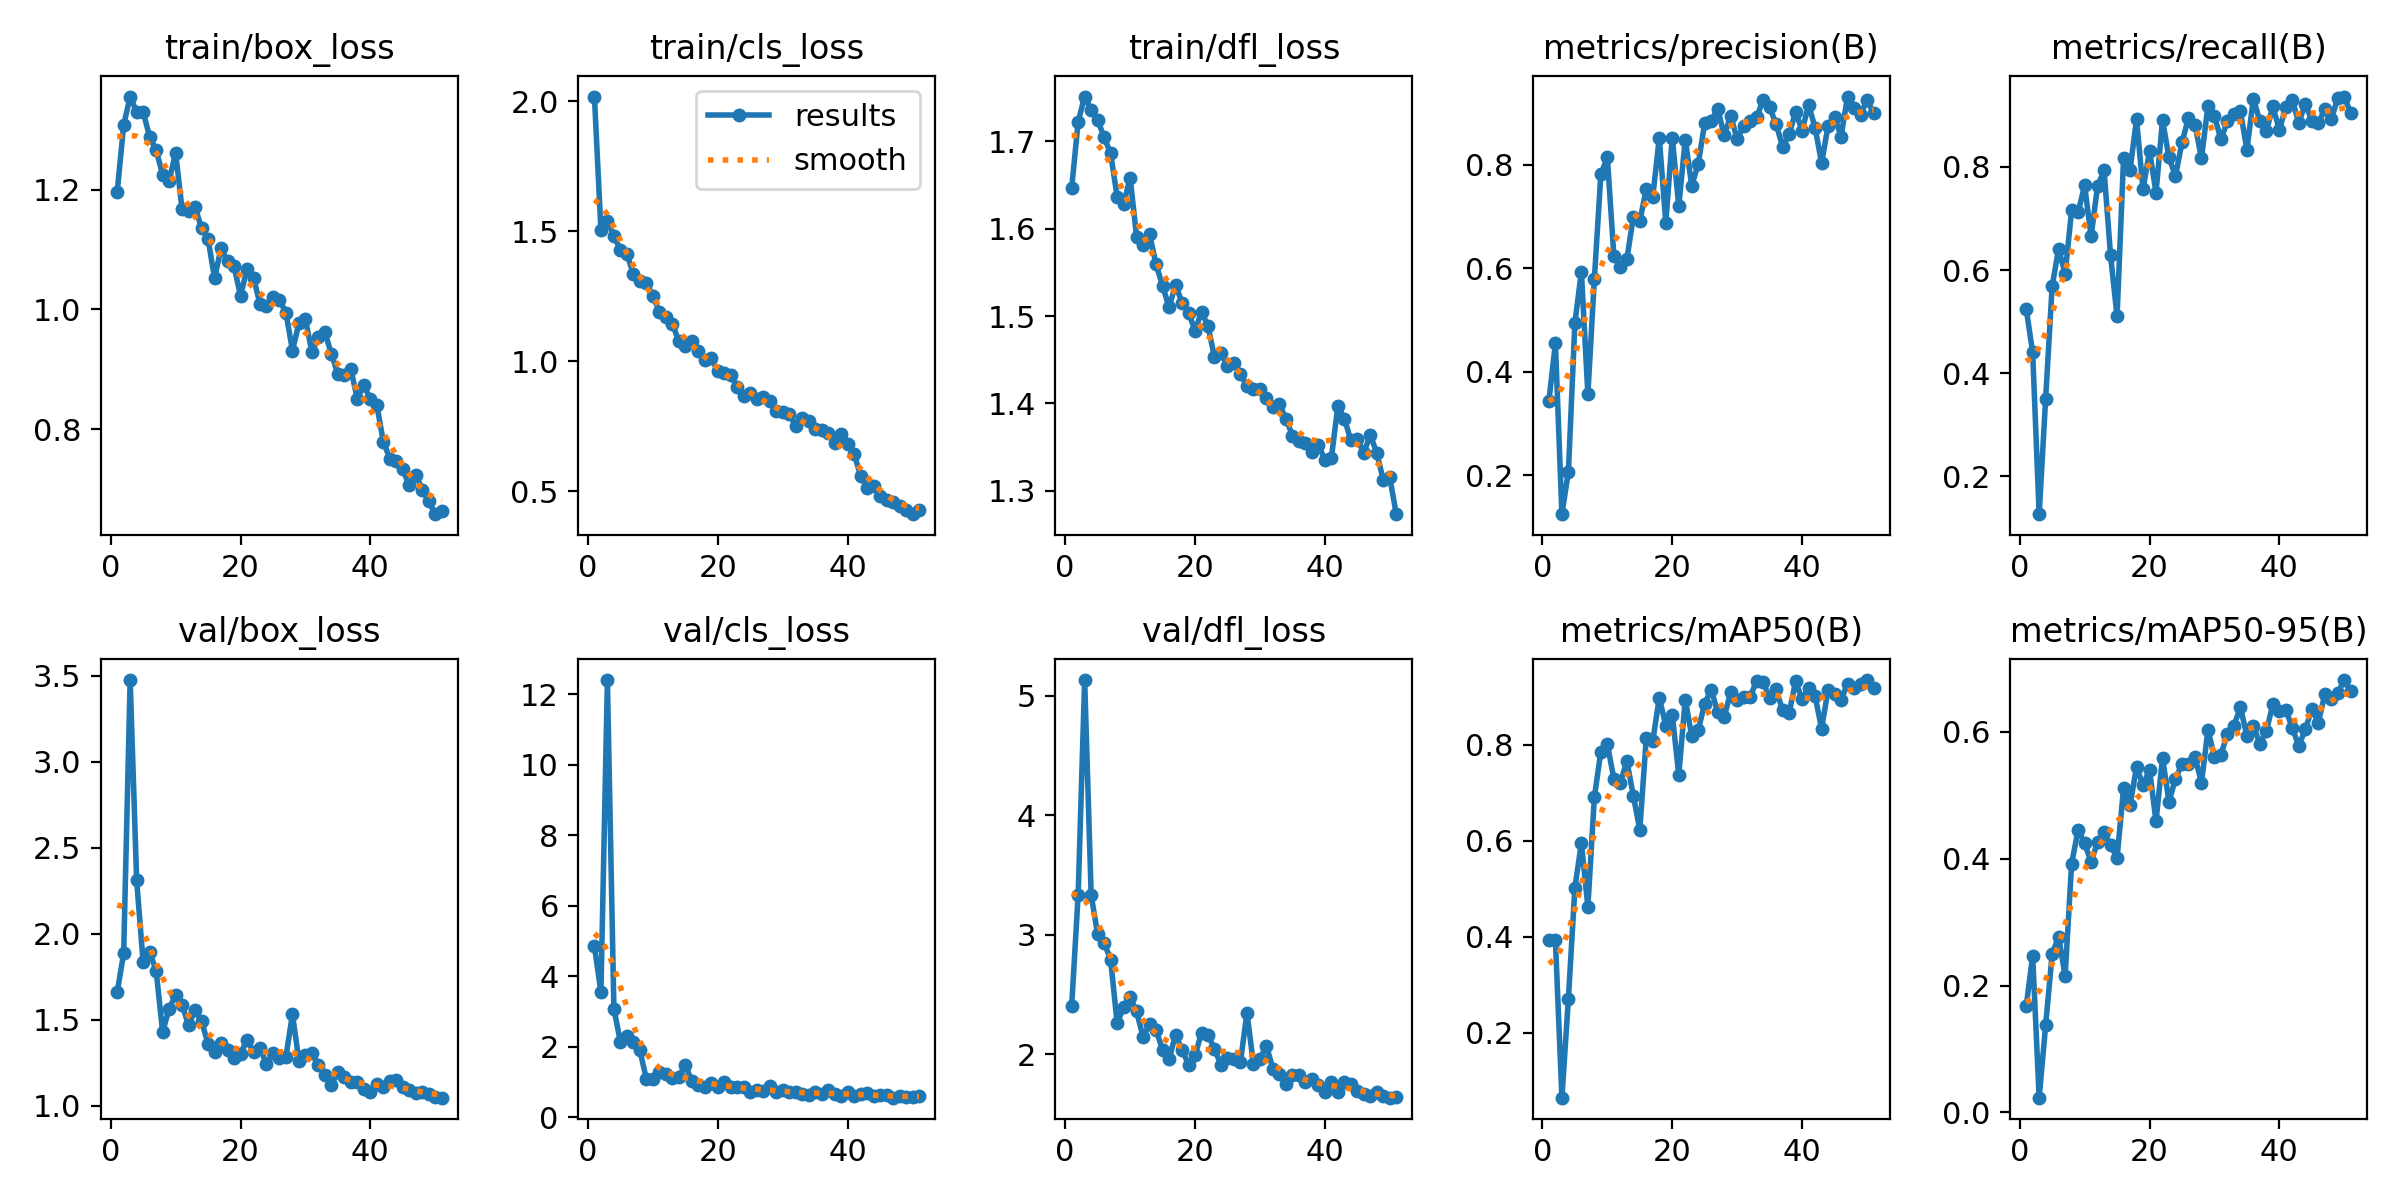

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=800)

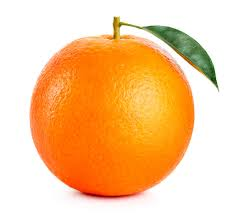

In [ ]:
Image(filename='/content/runs/detect/train/jeruk.jpeg', width=400)

In [ ]:
%cd
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml



/root
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Waste-Classification-1/valid/labels.cache... 96 images, 19 backgrounds, 0 corrupt: 100% 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:02<00:00,  2.06it/s]
                   all         96         83      0.925      0.935      0.935      0.682
                    B3         21         22      0.781      0.809      0.815      0.567
             anorganik         27         32          1      0.996      0.995      0.654
               organik         29         29      0.994          1      0.995      0.825
Speed: 1.7ms preprocess, 11.0ms inference, 0.1ms loss, 8.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [3]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/real001.jpg


/root
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 972, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 558, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 188, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 36, in generator_context
    response = gen.send(None)
  File "/usr/local/lib/py

In [ ]:
!pip install pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=5655194000db247eb19d7f5ae01d00d73b03ed90e644b7a0607832cc0c2f170b
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


In [ ]:
!pip install pickle-mixin

In [ ]:

import pickle

# Load the trained weights
weights_path = '/content/runs/detect/train/weights/best.pt'  # Replace with your actual path
# Load and convert the weights to a pickle file
with open(weights_path, 'rb') as f:
    weights = f.read()
pickle.dump(weights, open('yolov8.pkl', 'wb'))

In [ ]:
from google.colab import files
files.download('yolov8.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Menyalin folder dan file dari Colab ke Google Drive
shutil.copytree('/content/runs', '/content/drive/MyDrive/runs')
shutil.copy('/content/yolo11n.pt', '/content/drive/MyDrive/yolo11n.pt')
shutil.copy('/content/yolov8s.pt', '/content/drive/MyDrive/yolov8s.pt')



'/content/drive/MyDrive/yolov8s.pt'

In [ ]:
import shutil

shutil.copytree('/content/Waste-Classification-1', '/content/drive/MyDrive/Waste-Classification-1')

'/content/drive/MyDrive/Waste-Classification-1'

In [ ]:
!pip install ultralytics opencv-python-headless


In [ ]:
if os.path.exists('/content/aqua.jpeg'):
    print("File ditemukan!")
else:
    print("File tidak ditemukan!")



File ditemukan!



0: 448x640 1 B3, 14.0ms
Speed: 4.6ms preprocess, 14.0ms inference, 478.3ms postprocess per image at shape (1, 3, 448, 640)


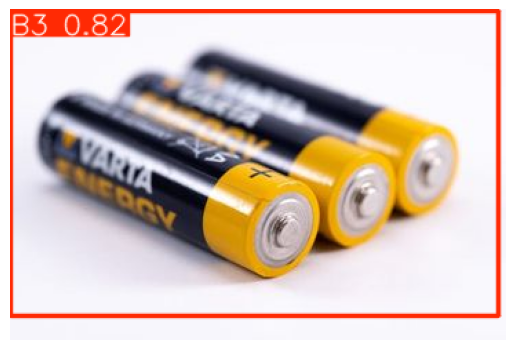

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Muat model YOLOv8
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Memuat model yang sudah dilatih

# Membaca gambar yang diunggah
image = cv2.imread('/content/batrai1.jpg')  # Gantilah dengan nama file gambar Anda

# Mengubah gambar dari BGR (OpenCV format) ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Deteksi objek dalam gambar
results = model(image_rgb)  # Deteksi objek

# Menggambar hasil deteksi pada gambar
annotated_image = results[0].plot()  # Hasil deteksi yang sudah dianotasi

# Menampilkan gambar dengan matplotlib
plt.imshow(annotated_image)
plt.axis('off')  # Menyembunyikan axis untuk tampilan yang lebih bersih
plt.show()  # Menampilkan gambar yang sudah dianotasi


Saving i.png to i.png

0: 384x640 1 anorganik, 39.6ms
Speed: 14.9ms preprocess, 39.6ms inference, 737.8ms postprocess per image at shape (1, 3, 384, 640)


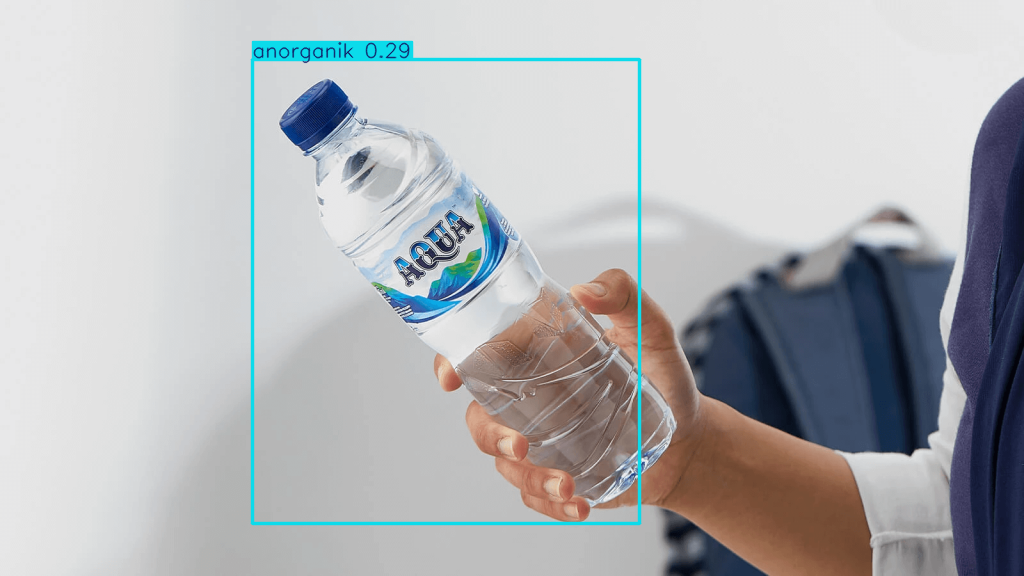

In [5]:
import cv2
import torch
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np
import io

# Memuat model YOLOv8
model = YOLO('best.pt')

# Fungsi untuk menerima input gambar dari file upload
def upload_image():
    uploaded = files.upload()  # Ini akan meminta pengguna untuk meng-upload file
    for filename in uploaded.keys():
        # Membaca gambar yang di-upload
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
        return img

# Mengunggah dan membaca gambar
frame = upload_image()

# Jalankan deteksi menggunakan model YOLOv8
results = model(frame)

# Plot hasil deteksi pada frame
annotated_frame = results[0].plot()

# Tampilkan frame menggunakan cv2_imshow (khusus untuk Colab)
cv2_imshow(annotated_frame)

# Hentikan proses setelah satu gambar
# cv2.destroyAllWindows()


Saving 360_F_960495690_XW9kra21yBAqeYRl4eDHtAwH4VwcnaWG.jpg to 360_F_960495690_XW9kra21yBAqeYRl4eDHtAwH4VwcnaWG.jpg

0: 640x640 2 organiks, 16.2ms
Speed: 2.6ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


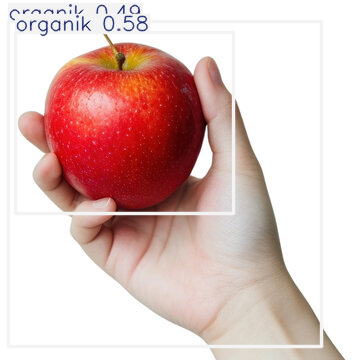

In [6]:
import cv2
import torch
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np
import io

# Memuat model YOLOv8
model = YOLO('best.pt')

# Fungsi untuk menerima input gambar dari file upload
def upload_image():
    uploaded = files.upload()  # Ini akan meminta pengguna untuk meng-upload file
    for filename in uploaded.keys():
        # Membaca gambar yang di-upload
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
        return img

# Mengunggah dan membaca gambar
frame = upload_image()

# Jalankan deteksi menggunakan model YOLOv8
results = model(frame)

# Plot hasil deteksi pada frame
annotated_frame = results[0].plot()

# Tampilkan frame menggunakan cv2_imshow (khusus untuk Colab)
cv2_imshow(annotated_frame)

# Hentikan proses setelah satu gambar
# cv2.destroyAllWindows()
